In [82]:
# importing the required modules
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver

In [83]:
df = pd.read_csv('Intermediate_links.csv')
df["0"]
ilinks = list(df["0"])
ilinks

['m.kin.naver.com/mobile/expert/search?itemType=EXPERT&category=90&online=true&sortType=TIME',
 'm.kin.naver.com/mobile/expert/search?itemType=EXPERT&category=2&online=true&sortType=TIME',
 'm.kin.naver.com/mobile/expert/search?itemType=EXPERT&category=320&online=true&sortType=TIME',
 'm.kin.naver.com/mobile/expert/search?itemType=EXPERT&category=129&online=true&sortType=TIME',
 'm.kin.naver.com/mobile/expert/search?itemType=EXPERT&category=122&online=true&sortType=TIME',
 'm.kin.naver.com/mobile/expert/search?itemType=EXPERT&category=1&online=true&sortType=TIME',
 'm.kin.naver.com/mobile/expert/search?itemType=EXPERT&category=58&online=true&sortType=TIME',
 'm.kin.naver.com/mobile/expert/search?itemType=EXPERT&category=183&online=true&sortType=TIME',
 'm.kin.naver.com/mobile/expert/search?itemType=EXPERT&category=435&online=true&sortType=TIME',
 'm.kin.naver.com/mobile/expert/search?itemType=EXPERT&category=293&online=true&sortType=TIME',
 'm.kin.naver.com/mobile/expert/search?itemTyp

In [86]:
plinks = []
profile_links = []

In [87]:
driver = webdriver.Chrome(r'C:\Users\USER\chromedriver_win32\chromedriver.exe')  
url = "https://"+ilinks[0]
print(url)

https://m.kin.naver.com/mobile/expert/search?itemType=EXPERT&category=90&online=true&sortType=TIME


'<html lang="ko"><head>\n\t\n\t\t<!-- IE 호환성보기 이슈 수정을 위한 Meta 태그 추가 -->\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\n\n\t\n\t\t\n\t\t\n\t\t\n\t\t\n\t\t\t<link rel="apple-touch-icon-precomposed" sizes="114x114" href="/static/mobileweb_icon_114.png">\n\t\t\t<link rel="apple-touch-icon-precomposed" href="/static/mobileweb_icon_57.png">\n\t\t\n\t\n\t<meta http-equiv="Content-Type" content="text/html;charset=utf-8">\n\t\n\t<meta name="msapplication-config" content="none">\n\n\t\n\t\t\n\t\t\t<meta name="robots" content="index,nofollow">\n\t\t\n\t\t\n\t\n\n\t\n\t\t\n\t\t\n\t\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densitydpi=medium-dpi">\n\t\t\n\t\t\n\t\n\n\t\n\n\t<script type="text/javascript">\n\t\ttry {\n\t\t\tdocument.domain = "naver.com";\n\t\t} catch (e) {\n\t\t}\n\t</script>\n\n\t<link rel="image_src" href="https://ssl.pstatic.net/static/kin/common/kin_thumbnail_w
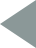
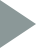

In [93]:
driver.get(url)
s = driver.page_source
s

In [1]:
soup = BeautifulSoup(s, 'html.parser')
content = soup.find_all('a', class_="ProductCardfragment__HoverStyledLink-jvv2ql-0 lmeJlb")
print(content)

NameError: name 'BeautifulSoup' is not defined